# Spotify Saved Songs Analysis 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
songs = pd.read_csv('saved_songs.csv', sep='\t')
artists = pd.read_csv('artists_infos.csv', sep='\t')

In [13]:
songs.head()

,added_at,song_id,song_name,duration_ms,song_popularity,artists_ids,n_artists,first_artist_id,artist_id
0,2019-09-28 00:48:35+00:00,4TIONK6tnZWlNl5HdKpWby,Dondante,479306,45,[43O3c6wewpzPKwVaGEEtBM],1,43O3c6wewpzPKwVaGEEtBM,43O3c6wewpzPKwVaGEEtBM
1,2019-09-28 00:21:47+00:00,6ZDk3PGFkRKGgk6aSkw2T9,A Fine Way to Die,400982,49,"[25oLRSUjJk4YHNUsQXk7Ut, 2twGthIPnZl1icD7K2jXx3]",2,25oLRSUjJk4YHNUsQXk7Ut,25oLRSUjJk4YHNUsQXk7Ut
2,2019-09-26 18:00:50+00:00,36xZeDLfY3pSGZdQadvEvd,Vermelho,302280,42,[2HubQ6TEbD7HknCNrBsqhR],1,2HubQ6TEbD7HknCNrBsqhR,2HubQ6TEbD7HknCNrBsqhR
3,2019-09-26 17:06:12+00:00,23kqlWwszJs8NRFkCQ5L5U,Ensaio Sobre Ela,238664,50,[6a5wUPC879Kyfw0aXxVatB],1,6a5wUPC879Kyfw0aXxVatB,6a5wUPC879Kyfw0aXxVatB
4,2019-09-26 15:30:48+00:00,6g0o3FK5GqsjPV488bBtDj,Dinossauros,266546,46,[3pnpaEYzaDj5zJluhXbVrG],1,3pnpaEYzaDj5zJluhXbVrG,3pnpaEYzaDj5zJluhXbVrG


In [14]:
artists.head()

,artist_id,genres,artist_popularity
0,11TlWPqyDFLHGccTFQhcc6,"['filter house', 'retro electro']",47
1,35U9lQaRWSQISxQAB94Meo,"['album rock', 'art rock', 'classic rock', 'co...",69
2,7DWwtWoYH8jhf28tq3118m,[],30
3,43sZBwHjahUvgbx1WNIkIz,"['alternative metal', 'nu metal', 'pop rock', ...",68
4,0gadJ2b9A4SKsB1RFkBb66,"['neo mellow', 'pop']",74


## EDA

In [3]:
songs.loc[:, 'added_at'] = pd.to_datetime(songs.added_at)
songs.loc[:, 'artists_ids'] = songs.artists_ids.apply(lambda x: eval(x))
songs.loc[:, 'n_artists'] = songs.artists_ids.apply(lambda x: len(x))

In [15]:
artists.loc[:, 'genres'] = artists.genres.apply(lambda x: eval(x))

### Song Duration 

In [4]:
green = '#1db954'
gray = '#191414'

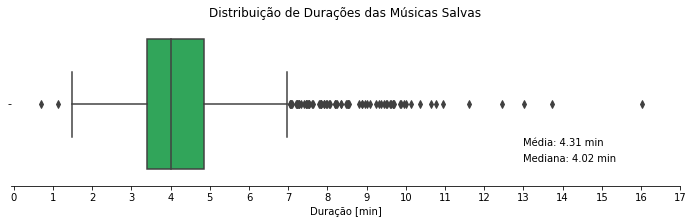

Música mais longa: I'm the Mountain (16 min)
Música mais curta: Gravity Falls Main Title Theme (from "Gravity Falls") (41 s)


In [33]:
f, ax = plt.subplots(figsize=(12, 3))

dist = songs.duration_ms/1000/60
sns.boxplot(dist, ax=ax, color=green)

ax.set_xticks(np.arange(0, 18))
ax.set_xlabel('Duração [min]')
ax.set_title('Distribuição de Durações das Músicas Salvas')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.annotate(s='Média: {0:.2f} min'.format(dist.mean()), xy=(13, .25))
ax.annotate(s='Mediana: {0:.2f} min'.format(np.percentile(dist, 50)), xy=(13, 0.35))

plt.show()

max_dur = songs[songs.duration_ms == songs.duration_ms.max()]
min_dur = songs[songs.duration_ms == songs.duration_ms.min()]

print('Música mais longa:', max_dur.song_name.iloc[0], '({:.0f} min)'.format(max_dur.duration_ms.iloc[0] / 1000 / 60))
print('Música mais curta:', min_dur.song_name.iloc[0], '({:.0f} s)'.format(min_dur.duration_ms.iloc[0] / 1000))

### Nº of Artists

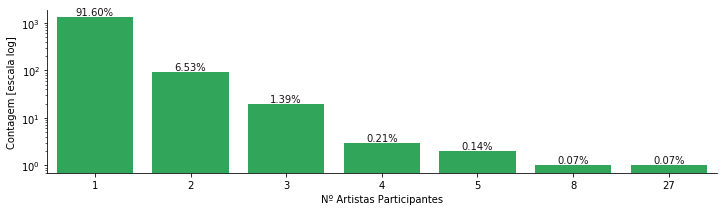

In [7]:
f, ax = plt.subplots(figsize=(12, 3))

g = sns.countplot(songs.n_artists, color=green, ax=ax)

values = songs.n_artists.value_counts().values

for p, v in zip(ax.patches, values):
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{0:.2%}'.format(v / values.sum()), (x.mean(), y), color=gray, ha='center', va='bottom') # set the alignment of the text

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yscale('log')
ax.set_xlabel('Nº Artistas Participantes')
ax.set_ylabel('Contagem [escala log]')

plt.show()

Menos de 10% das músicas possuem mais de um artista colaborador. O estilo será coletado a partir do primeiro artista do array de artistas, por fins de simplicidade.

### Genres

In [9]:
songs.loc[:, 'artist_id'] = songs.artists_ids.apply(lambda x: x[0])

In [17]:
df = songs.merge(artists, on='artist_id')

In [22]:
df.loc[:, 'n_genres'] = df.genres.apply(lambda x: len(x))

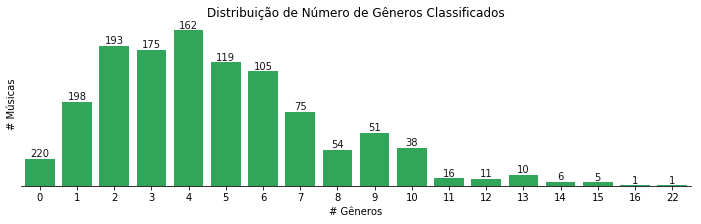

In [58]:
f, ax = plt.subplots(figsize=(12, 3))

sns.countplot(df.n_genres, ax=ax, color=green)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([])
ax.set_ylabel('# Músicas')
ax.set_xlabel('# Gêneros')
ax.set_title('Distribuição de Número de Gêneros Classificados')

values = df.n_genres.value_counts().values
for p, v in zip(ax.patches, values):
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{0}'.format(v), (x.mean(), y), color=gray, ha='center', va='bottom') # set the alignment of the text
    
plt.show()

Há 220 músicas sem um gênero específicado.

In [43]:
list(set(df.genres.sum()))

['brazilian post-hardcore',
 'protopunk',
 'pop nacional',
 'brazilian rock',
 'nashville indie',
 'art rock',
 'alternative pop',
 'instrumental math rock',
 'modern blues',
 'shiver pop',
 'adult standards',
 'wrestling',
 'funk',
 'canterbury scene',
 'theme',
 'sacramento indie',
 'final fantasy',
 'smooth jazz',
 'icelandic pop',
 'british folk',
 'gothic rock',
 'chillstep',
 'southern rock',
 'bandoneon',
 'funk metal',
 'retro metal',
 'metropopolis',
 'funk carioca',
 'australian reggae fusion',
 'comic',
 'jangle pop',
 'new orleans jazz',
 'nz pop',
 'modern blues rock',
 'emo',
 'roots rock',
 'jazz drums',
 'northern irish indie',
 'brazilian hardcore',
 'soul',
 'cantautor',
 'progressive house',
 'australian psych',
 'french rock',
 'ska revival',
 'post-punk',
 'vintage french electronic',
 'ninja',
 'soul jazz',
 'cosmic american',
 'mangue bit',
 'classic soul',
 'forro',
 'albuquerque indie',
 'jazz blues',
 'psychedelic rock',
 'jazztronica',
 'boston punk',
 'thras